# Re identificación de personas (ReID) utilizando Triplet Loss y MobileNets

El modelo se basa en una variación de la función de pérdida denominada **Triplet Loss** para la re identificación de personas y en **MobileNets**, que utiliza **Depthwise Separable Convolution** para reducir una porción significante del tamaño del modelo y mantener un buen desempeño.

La re identificacion es el proceso de identificar la persona de fotos tomadas de diferentes cámaras o en diferentes ocasiones de la misma cámara con campos de vista no superpuestos (para realizar seguimiento tras cortes en la escena)

# Importación de la API
En este ejemplo se creó una API, la cual es importada, además de otras librerías necesarias.

In [4]:
import api
import cv2 
from matplotlib import pyplot as plt
import timeit
plt.ion()
%matplotlib inline


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



INFO:tensorflow:Scale of 0 disables regularizer.



Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model/checkpoint-25000


Las cargas de pesos del modelo pre entrenado se realiza en el archivo api.py línea 17
# tf.train.Saver().restore(sess, 'model/checkpoint-25000')


# Primer Ejemplo
Para el primer ejemplo se carga una imagen de 3 personas:

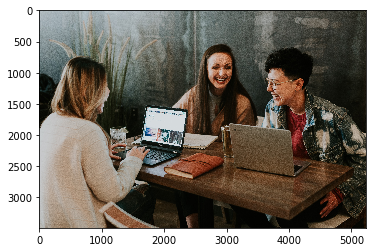

In [11]:
people = cv2.imread('test/people.jpg')[:,:,::-1]
plt.imshow(people)

Seguidamente se llama a la función human_locations que con el modelo pre entrenado con MobileNetSSD que predice las 3 personas de la foto

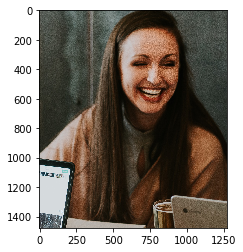

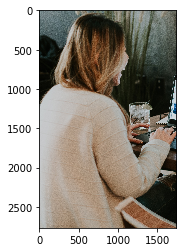

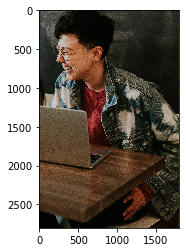

In [14]:
people_location = api.human_locations(people)
people_human = api.crop_human(people, people_location)

for human in people_human:
    plt.imshow(human)
    plt.show()
 

# Segundo Ejemplo
Para el segundo ejemplo se toman 2 imágenes de una escena la serie de TV: The big bang theory

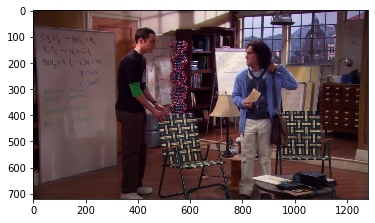

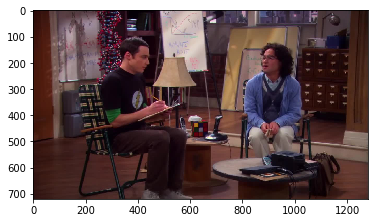

In [16]:
people2 = cv2.imread('test/001.jpeg')[:,:,::-1]
people3 = cv2.imread('test/002.jpeg')[:,:,::-1]

plt.imshow(people2)
plt.show()

plt.imshow(people3)

Aplicamos la detección de las 2 personas en las 2 imágenes:

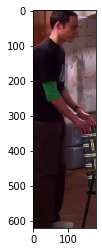

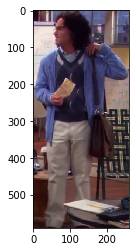

In [17]:
people2_location = api.human_locations(people2)
people2_human = api.crop_human(people2, people2_location)

for human in people2_human:
    plt.imshow(human)
    plt.show()
    
people3_location = api.human_locations(people3)
people3_human = api.crop_human(people3, people3_location)

for human in people3_human:
    plt.imshow(human)
    plt.show()    

Se obtienen los vectores de las personas detectadas a partir de MobileNet

In [19]:
t1 = timeit.default_timer()
human_1_1_vector = api.human_vector(people2_human[0])
human_1_2_vector = api.human_vector(people2_human[1])
human_2_1_vector = api.human_vector(people3_human[0])
human_2_2_vector = api.human_vector(people3_human[1])
t2 = timeit.default_timer()
print('Time elasped: {} sec'.format(round(t2-t1, 3)))

Time elasped: 0.708 sec


# Re identificación
Se calculan las distancias entre las personas detectadas, siendo las más cortas las de las mismas personas

In [20]:
api.human_distance(human_1_1_vector, human_1_2_vector)

26.40721

In [21]:
api.human_distance(human_1_1_vector, human_2_1_vector)

10.540679

In [22]:
api.human_distance(human_1_1_vector, human_2_2_vector)

28.450695

In [23]:
api.human_distance(human_1_2_vector, human_2_1_vector)

24.851274

In [24]:
api.human_distance(human_1_2_vector, human_2_2_vector)

13.433527

In [25]:
api.human_distance(human_2_1_vector, human_2_2_vector)

26.483643